# Tensorflow

The lastest version of Tensorflow-GPU (for windows) is 2.10

EX. Numbers classification with MNIST dataset

Get MNist dataset

In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
len(test_labels)

10000

The network architecture

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [ ]:
model.compile(
    optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

Preparing the image data

In [ ]:
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype("float32") / 255

Training the model

In [ ]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8726 - loss: 0.4468
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9630 - loss: 0.1214
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9778 - loss: 0.0752
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9851 - loss: 0.0524
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9885 - loss: 0.0387


In [ ]:
test_digits = test_images[0: 10]
predictions = model.predict(test_digits)
predictions[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


array([2.6168648e-08, 2.9036122e-09, 5.9836179e-06, 1.9489204e-04,
       1.3323213e-11, 1.1241200e-08, 7.3039833e-13, 9.9979043e-01,
       3.9796245e-08, 8.6052905e-06], dtype=float32)

In [ ]:
predictions[0].max()

np.float32(0.99979043)

In [ ]:
predictions[0].argmax()

np.int64(7)

In [ ]:
test_labels[0] # -2^63 ~ 2^63

np.uint8(7)

# Data representations for neural networks

In [ ]:
import numpy as np

Scalars (rank-0 tensors)

In [ ]:
x = np.array(22)
x

array(22)

In [ ]:
x.ndim

0

Vector (Rank-1 tensors)

In [ ]:
x = np.array([1, 3, 5, 7, 9, 11])
x

array([ 1,  3,  5,  7,  9, 11])

In [ ]:
x.ndim

1

Matrix (Rank-2 tensors)

In [ ]:
x = np.array([
    [1, 3, 5, 7, 9, 11],
    [1, 3, 5, 7, 9, 11],
    [1, 3, 5, 7, 9, 11]
])
x

array([[ 1,  3,  5,  7,  9, 11],
       [ 1,  3,  5,  7,  9, 11],
       [ 1,  3,  5,  7,  9, 11]])

In [ ]:
x.ndim

2

Rank-3 and Higher-rank tensors

In [ ]:
x = np.array([
    [
        [1, 3, 5, 7, 9, 11],
        [1, 3, 5, 7, 9, 11],
        [1, 3, 5, 7, 9, 11]
    ],
    [
        [1, 3, 5, 7, 9, 11],
        [1, 3, 5, 7, 9, 11],
        [1, 3, 5, 7, 9, 11]
    ],
    [
        [1, 3, 5, 7, 9, 11],
        [1, 3, 5, 7, 9, 11],
        [1, 3, 5, 7, 9, 11]
    ],
])
x.ndim

3

# Key attributes

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
train_images.ndim

3

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
train_images.dtype  # GRAY [0, 255]

dtype('uint8')

Displaying the forth digit

In [ ]:
import matplotlib.pyplot as plt

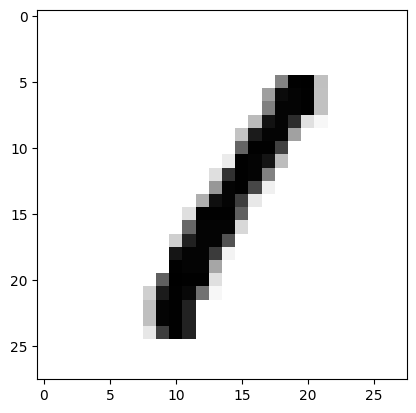

In [ ]:
digit = train_images[3]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

# Manipulating tensors in NumPy

In [ ]:
my_slice = train_images[10: 100] # 10~99
my_slice.shape

(90, 28, 28)

In [ ]:
my_slice = train_images[10: 100, :, :]
my_slice.shape

(90, 28, 28)

In [ ]:
my_slice = train_images[10: 100, 0: 28, 0: 28]
my_slice.shape

(90, 28, 28)

# The notion of data batches

In [ ]:
batch = train_images[: 128]
batch.shape

(128, 28, 28)

In [ ]:
batch = train_images[128: 256]
batch.shape

(128, 28, 28)

In [ ]:
n = 3
batch = train_images[128*n: 128*(n + 1)]
batch.shape

(128, 28, 28)

# The gears of neural networks: Tensor operations

Element-wise operations

In [ ]:
def naive_relu(x):
  assert len(x.shape) == 2
  x = x.copy()
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i, j] = max(x[i, j], 0)
  return x

In [ ]:
def naive_add(x, y):
  assert len(x.shape) == 2
  assert x.shape == y.shape
  x = x.copy()
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i, j] += y[i, j]
  return x

In [ ]:
import time
x = np.random.random((20, 100))
y = np.random.random((20, 100))

t0 = time.time()
for _ in range(1000):
  z = x + y
  z = np.maximum(z, 0.)
print("Took: {:.2f} s".format(time.time() - t0))

Took: 0.01 s


In [ ]:
t0 = time.time()
for _ in range(1000):
  z = naive_add(x, y)
  z = naive_relu(z)
print("Took: {:.2f} s".format(time.time() - t0))

Took: 2.24 s


# Broadcasting

In [ ]:
x = np.random.random((32, 10))
y = np.random.random((10,))

In [ ]:
y = np.expand_dims(y, axis=0)
y.shape

(1, 10)

In [ ]:
y

array([[0.70940576, 0.59090025, 0.5492931 , 0.2578385 , 0.25381245,
        0.70703331, 0.87991942, 0.87189585, 0.88280841, 0.25463734]])

In [ ]:
Y = np.concatenate([y] * 32, axis=0)
Y.shape

(32, 10)

In [ ]:
Y

array([[0.70940576, 0.59090025, 0.5492931 , 0.2578385 , 0.25381245,
        0.70703331, 0.87991942, 0.87189585, 0.88280841, 0.25463734],
       [0.70940576, 0.59090025, 0.5492931 , 0.2578385 , 0.25381245,
        0.70703331, 0.87991942, 0.87189585, 0.88280841, 0.25463734],
       [0.70940576, 0.59090025, 0.5492931 , 0.2578385 , 0.25381245,
        0.70703331, 0.87991942, 0.87189585, 0.88280841, 0.25463734],
       [0.70940576, 0.59090025, 0.5492931 , 0.2578385 , 0.25381245,
        0.70703331, 0.87991942, 0.87189585, 0.88280841, 0.25463734],
       [0.70940576, 0.59090025, 0.5492931 , 0.2578385 , 0.25381245,
        0.70703331, 0.87991942, 0.87189585, 0.88280841, 0.25463734],
       [0.70940576, 0.59090025, 0.5492931 , 0.2578385 , 0.25381245,
        0.70703331, 0.87991942, 0.87189585, 0.88280841, 0.25463734],
       [0.70940576, 0.59090025, 0.5492931 , 0.2578385 , 0.25381245,
        0.70703331, 0.87991942, 0.87189585, 0.88280841, 0.25463734],
       [0.70940576, 0.59090025, 0.5492931

In [ ]:
x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10))
z = np.maximum(x, y)
a = x + y
# a.shape
z.shape

(64, 3, 32, 10)

In [ ]:
def narve_add_matrix_and_vertor(x, y):
  assert len(x.shape) == 2
  assert len(y.shape) == 1
  assert x.shape[1] == y.shape[0]

  x = x.copy()
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i, j] += y[i]
  return x

In [ ]:
x = np.array([[1, 2], [3 ,4]])
y = np.array([10, 20])
narve_add_matrix_and_vertor(x, y)

array([[11, 12],
       [23, 24]])

# Tensor preduct

In [ ]:
x = np.random.random((32,))
y = np.random.random((32,))
z = np.dot(x, y)
z.shape

()

In [ ]:
def naive_vector_dot(x, y):
  assert len(x.shape) == 1
  assert len(y.shape) == 1
  assert x.shape[0] == y.shape[0]
  z = 0.
  for i in range(x.shape[0]):
    z += x[i] * y[i]
  return z

In [ ]:
x = np.random.random((32,))
y = np.random.random((32,))
z = naive_vector_dot(x, y)
z.shape

()

In [ ]:
def naive_matrix_vector_dot(x, y):
  assert len(x.shape) == 2
  assert len(y.shape) == 1
  assert x.shape[1] == y.shape[0]
  z = np.zeros(x.shape[0])
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      z[i] += x[i, j] * y[j]
  return z

In [ ]:
x = np.random.random((1, 32))
y = np.random.random((32,))
z = naive_matrix_vector_dot(x, y)
z.shape

(1,)

In [ ]:
def narve_matrix_dot(x, y):
  assert len(x.shape) == 2
  assert len(y.shape) == 2
  assert x.shape[1] == y.shape[0]
  z = np.zeros((x.shape[0], y.shape[1]))
  for i in range(x.shape[0]):
    for j in range(y.shape[1]):
      row_x = x[i, :]
      column_y = y[:, j]
      z[i, j] = naive_vector_dot(row_x, column_y)
  return z

In [ ]:
x = np.random.random((1, 32))
y = np.random.random((32, 32))
z = narve_matrix_dot(x, y)
z.shape

(1, 32)

# Tensor Reshaping

In [ ]:
x = np.array([
    [0, 1],
    [2, 3],
    [4, 5]
])

In [ ]:
a = x.reshape((6, 1))
a

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5]])

In [ ]:
b = x.reshape((2, 3))
b

array([[0, 1, 2],
       [3, 4, 5]])

In [ ]:
c = x.reshape((3, 3))
c

ValueError: cannot reshape array of size 6 into shape (3,3)

In [ ]:
X = np.zeros((300, 20))
Y = np.transpose(X)
Y.shape

(20, 300)

In [ ]:
x = np.array([
    [0, 1],
    [2, 3],
    [4, 5]
])
x

array([[0, 1],
       [2, 3],
       [4, 5]])

In [ ]:
y = np.transpose(x)
y

array([[0, 2, 4],
       [1, 3, 5]])